In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import warnings
import pickle
import myUtils
import os
import matplotlib.pyplot as plt
from myUtils import *
from models.utils import *
from APOC import *

SEED = 84
torch.manual_seed(SEED)
warnings.simplefilter("ignore")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
# can be sentiment/offensive/corona
dataset_name = 'corona'
model_type = 'tinybert'
model_name = 'huawei-noah/TinyBERT_General_4L_312D'
sorting = 'confidence'
delta = 0.1
folder_name = f'results/{dataset_name}/{sorting}/{delta}'

In [3]:
model = torch.jit.load(f'models/{model_type}/{dataset_name}/traced.pt').to(device).eval()
tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast = False)
myUtils.model = model
myUtils.tokenizer = tokenizer
torch._C._jit_set_texpr_fuser_enabled(False)

In [4]:
explanations  = pickle.load(open(f"{folder_name}/exps_list.pickle", "rb" ))
anchor_examples = pickle.load(open(f"{folder_name}/anchor_examples.pickle", "rb" ))
print(f'anchor examples len: {len(anchor_examples)}')
print(f'explanations len: {len(explanations)}')

if not os.path.exists(f"{folder_name}/predictions.pickle"):
    predictions = [predict_sentences([tokenizer.tokenize(anchor_example)])[0] for anchor_example in anchor_examples]
    pickle.dump(predictions, open(f"{folder_name}/predictions.pickle", "wb" ))
    
labels = pickle.load(open(f"{folder_name}/predictions.pickle", "rb" ))

anchor examples len: 6072
explanations len: 123811


In [29]:
""" calculate avg / sum aggragation types """
ApocUtils.calculate_score(folder_name, tokenizer, anchor_examples, explanations, labels, 'avg')

2064


# APOC Corona

In [ ]:
dataset_name = 'corona'
folder_name = f'results/{dataset_name}/{sorting}/{delta}'
anchor_examples = pickle.load(open(f"{folder_name}/anchor_examples.pickle", "rb" ))
labels = pickle.load(open(f"{folder_name}/predictions.pickle", "rb" ))
model = torch.jit.load(f'models/{model_type}/{dataset_name}/traced.pt').to(device).eval()
myUtils.model = model

## Apoc

In [11]:
pos_scores, neg_scores = get_scores_dict(trail_path = "scores.xlsx")
pos_tokens = [k for k, v in sorted(pos_scores.items(), key=lambda item: -item[1])]
neg_tokens = [k for k, v in sorted(neg_scores.items(), key=lambda item: -item[1])]
apoc = APOC(model, tokenizer, anchor_examples, labels, pos_tokens, neg_tokens, f"{dataset_name} {sorting} {delta}")

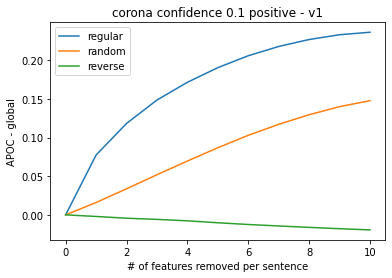

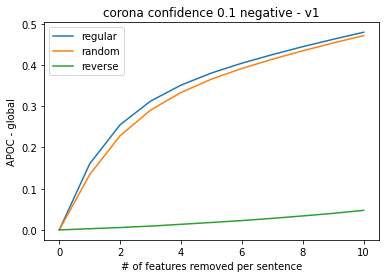

In [ ]:
apoc.apoc_global('v1', 'remove')

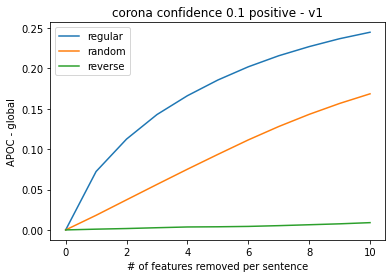

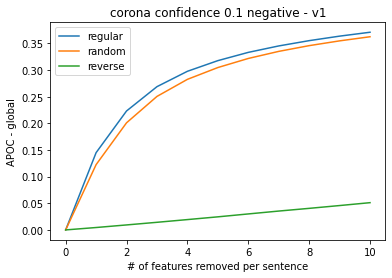

In [ ]:
apoc.apoc_global('v1', 'replace')

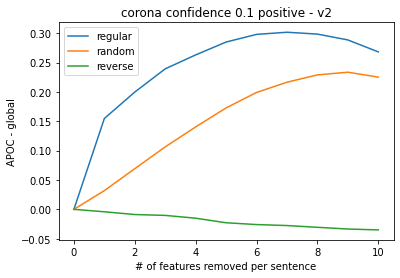

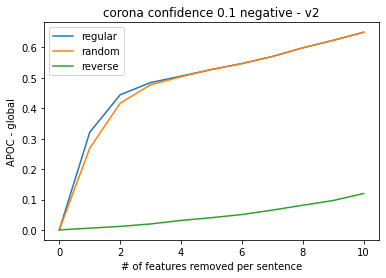

In [ ]:
apoc.apoc_global('v2', 'remove')

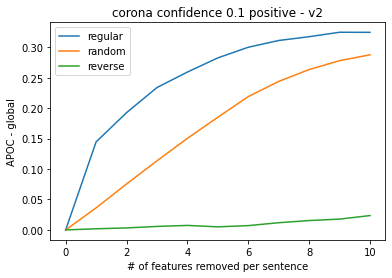

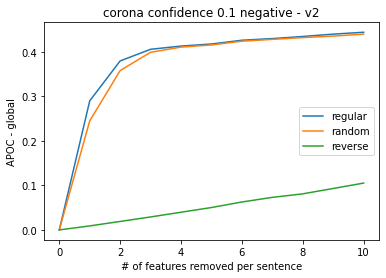

In [ ]:
apoc.apoc_global('v2', 'replace')

## Compare

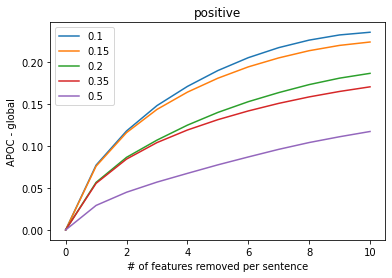

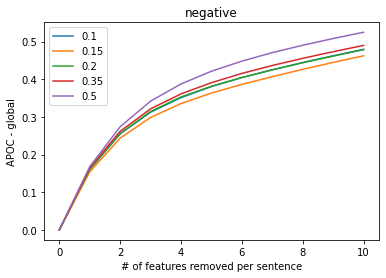

In [6]:
deltas = [0.1, 0.15, 0.2, 0.35, 0.5]
get_scores_fn = lambda delta: ApocUtils.get_scores_dict(folder_name, trail_path = f"../{delta}/scores.xlsx")
APOC.compare_apocs(model, tokenizer, deltas, get_scores_fn, anchor_examples, labels, deltas, num_removes = 10)

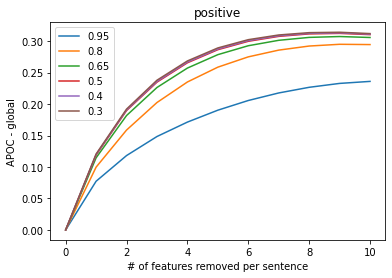

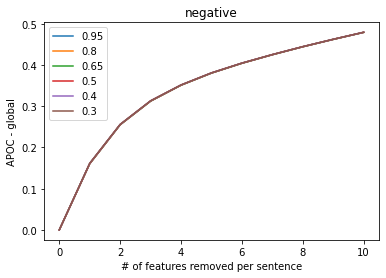

In [11]:
alphas = [0.95, 0.8, 0.65, 0.5, 0.4, 0.3]
get_scores_fn = lambda alpha: ApocUtils.get_scores_dict(folder_name, trail_path = "../0.1/scores.xlsx", alpha = alpha)
APOC.compare_apocs(model, tokenizer, alphas, get_scores_fn, anchor_examples, labels, alphas, num_removes = 10)

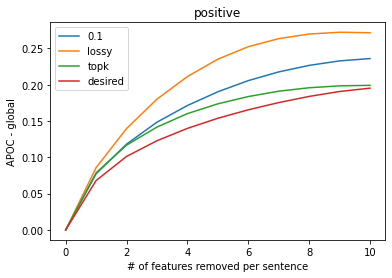

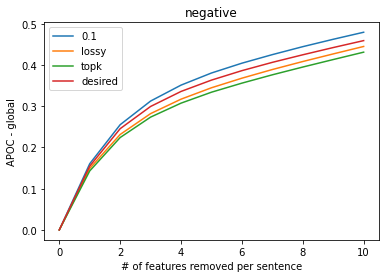

In [10]:
optimizations = [str(0.1), 'lossy', 'topk', 'desired']
get_scores_fn = lambda optimization: ApocUtils.get_scores_dict(folder_name, trail_path = f"../{optimization}/scores.xlsx")
APOC.compare_apocs(model, tokenizer, dptimizations, get_scores_fn, anchor_examples, labels, optimizations, num_removes = 10)

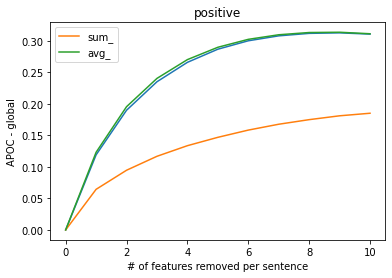

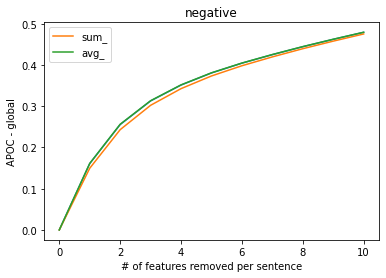

In [9]:
aggragations = ['', 'sum_', 'avg_']
alphas = [0.5, None, None]
get_scores_fn = lambda x: ApocUtils.get_scores_dict(folder_name, folder_name, trail_path = f"../0.1/{x[0]}scores.xlsx", alpha = x[1])
APOC.compare_apocs(model, tokenizer, zip(aggragations, alphas), get_scores_fn, anchor_examples, labels, aggragations, num_removes = 10)

### polarity

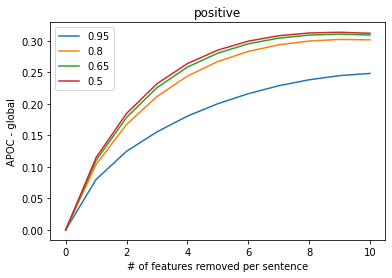

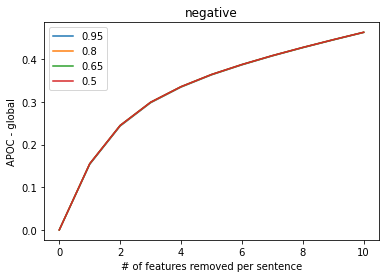

In [21]:
"""polarity"""
alphas = [0.95, 0.8, 0.65, 0.5, 0.4, 0.3]
get_scores_fn = lambda delta: ApocUtils.get_scores_dict(folder_name, trail_path = "../0.1/scores.xlsx", alpha = alpha)
APOC.compare_apocs(model, tokenizer, deltas, get_scores_fn, anchor_examples, labels, alphas, num_removes = 10)

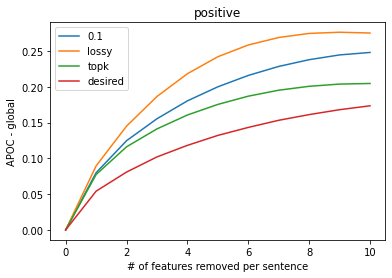

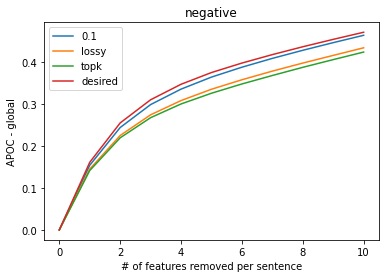

In [42]:
""" polarity """
optimizations = [str(0.1), 'lossy', 'topk', 'desired']
get_scores_fn = lambda delta: ApocUtils.get_scores_dict(folder_name, trail_path = f"../{optimization}/scores.xlsx")
APOC.compare_apocs(model, tokenizer, deltas, get_scores_fn, anchor_examples, labels, optimizations, num_removes = 10)

# APOC Dilemma

In [10]:
dataset_name = 'dilemma'
folder_name = f'results/{dataset_name}/{sorting}/{delta}'
anchor_examples = pickle.load(open(f"{folder_name}/anchor_examples.pickle", "rb" ))
labels = pickle.load(open(f"{folder_name}/predictions.pickle", "rb" ))
model = torch.jit.load(f'models/{model_type}/{dataset_name}/traced.pt').to(device).eval()
myUtils.model = model

## Apoc

In [ ]:
pos_scores, neg_scores = ApocUtils.get_scores_dict(folder_name, trail_path = "scores.xlsx")
apoc = APOC(model, tokenizer, anchor_examples, labels, pos_tokens, neg_tokens, f"{dataset_name} {sorting} {delta}", num_removes=10)

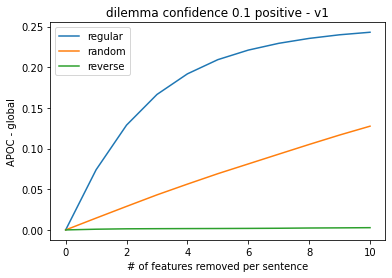

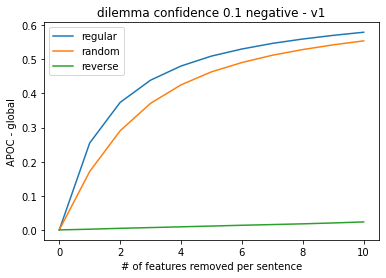

In [13]:
apoc.apoc_global('v1', 'remove')

In [ ]:
apoc.apoc_global('v2', 'remove')

In [ ]:
apoc.apoc_global('v1', 'replace')

In [ ]:
apoc.apoc_global('v2', 'replace')

## Compare

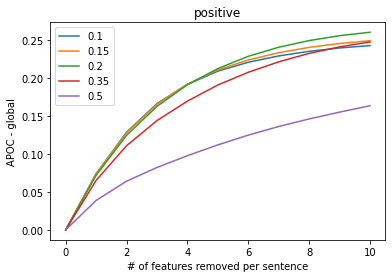

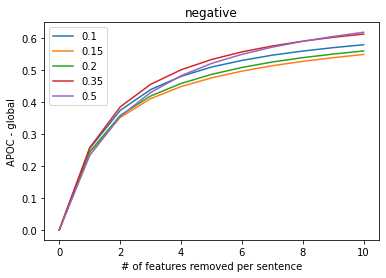

In [14]:
deltas = [0.1, 0.15, 0.2, 0.35, 0.5]
get_scores_fn = lambda delta: ApocUtils.get_scores_dict(folder_name, trail_path = f"../{delta}/scores.xlsx")
APOC.compare_apocs(model, tokenizer, deltas, get_scores_fn, anchor_examples, labels, deltas, num_removes = 10)

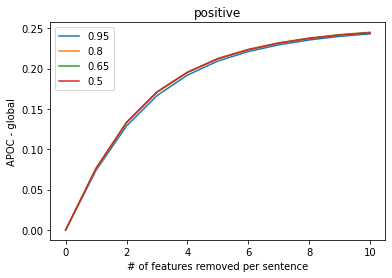

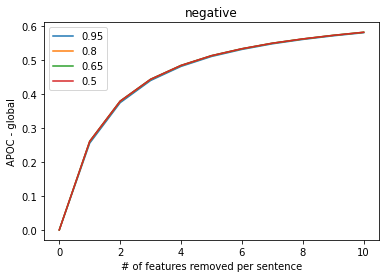

In [16]:
alphas = [0.95, 0.8, 0.65, 0.5, 0.4, 0.3]
get_scores_fn = lambda alpha: ApocUtils.get_scores_dict(folder_name, trail_path = "../0.1/scores.xlsx", alpha = alpha)
APOC.compare_apocs(model, tokenizer, alphas, get_scores_fn, anchor_examples, labels, alphas, num_removes = 10)

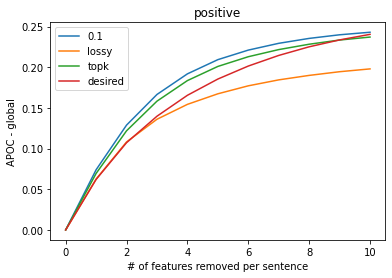

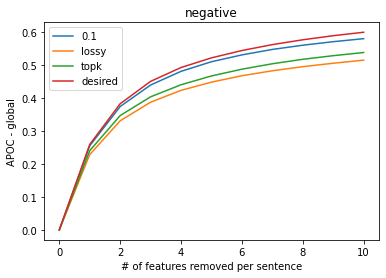

In [17]:
optimizations = [str(0.1), 'lossy', 'topk', 'desired']
get_scores_fn = lambda optimization: ApocUtils.get_scores_dict(folder_name, trail_path = f"../{optimization}/scores.xlsx")
APOC.compare_apocs(model, tokenizer, dptimizations, get_scores_fn, anchor_examples, labels, optimizations, num_removes = 10)

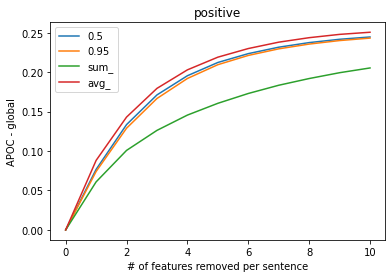

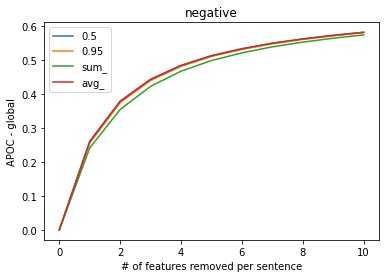

In [20]:
aggragations = ['', '', 'sum_', 'avg_']
alphas = [0.5, 0.95, None, None]
legends = [0.5, 0.95, 'sum', 'avg']
get_scores_fn = lambda x: ApocUtils.get_scores_dict(folder_name, folder_name, trail_path = f"../0.1/{x[0]}scores.xlsx", alpha = x[1])
APOC.compare_apocs(model, tokenizer, zip(aggragations, alphas), get_scores_fn, anchor_examples, labels, legends, num_removes = 10)